In [11]:
!pip install --upgrade pip
!pip install folium
!pip install ipython-autotime
!pip install output

import pandas as pd
pd.set_option("display.max_rows", None)
pd.options.display.max_columns = None

import folium
from folium import plugins
%matplotlib inline
import random, operator
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

%load_ext autotime
%pdb  # debugin

Requirement already up-to-date: pip in /anaconda3/lib/python3.7/site-packages (19.1.1)


The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
Incorrect argument. Use on/1, off/0, or nothing for a toggle.
time: 6.87 s


In [12]:
# jobs for one day
JobsInTime=pd.DataFrame([['16', 48, 14.8],
       ['22', 49, 25.0],
       ['28', 50, 74.8],
       ['22', 51, 59.8],
       ['22', 52, 59.8],
       ['71', 53, 25.0],
       ['28', 54, 95.2],
       ['28', 55, 35.2],
       ['71', 56, 25.0],
       ['29', 57, 40.0],
       ['28', 58, 29.8],
       ['29', 59, 50.2],
       ['64', 60, 35.2],
       ['28', 61, 55.0],
       ['29', 62, 29.8],
       ['22', 63, 70.0],
       ['28', 64, 40.0],
       ['28', 65, 35.2],
       ['16', 66, 40.0],
       ['16', 67, 29.8],
       ['16', 68, 85.0],
       ['17', 69, 55.0],
       ['77', 70, 40.0],
       ['29', 71, 70.0],
       ['29', 72, 40.0],
       ['23', 73, 29.8],
       ['22', 74, 40.0],
       ['22', 75, 40.0],
       ['22', 76, 25.0],
       ['16', 77, 59.8],
       ['70', 78, 44.8],
       ['23', 79, 44.8],
       ['22', 80, 29.8],
       ['28', 81, 40.0],
       ['16', 82, 40.0],
       ['16', 83, 25.0],
       ['70', 84, 50.2],
       ['23', 85, 55.0],
       ['17', 86, 59.8],
       ['73', 87, 50.2],
       ['28', 88, 70.0],
       ['17', 89, 40.0],
       ['77', 90, 29.8],
       ['71', 91, 40.0],
       ['76', 92, 25.0],
       ['23', 93, 35.0],
       ['16', 94, 25.0],
       ['64', 95, 44.8],
       ['73', 96, 50.2],
       ['29', 97, 44.8],
       ['28', 98, 25.0],
       ['73', 99, 25.0],
       ['65', 100, 55.0],
       ['22', 101, 40.0],
       ['77', 102, 25.0],
       ['23', 103, 55.0],
       ['16', 104, 59.8],
       ['17', 105, 40.0],
       ['65', 106, 29.8],
       ['16', 107, 80.2],
       ['29', 108, 25.0],
       ['76', 109, 32.8],
       ['17', 110, 50.2],
       ['22', 111, 35.2],
       ['76', 112, 40.0],
       ['16', 113, 40.0],
       ['22', 114, 23.8],
       ['22', 115, 35.2],
       ['28', 116, 50.2],
       ['70', 117, 50.2],
       ['29', 118, 35.2],
       ['77', 119, 25.0],
       ['28', 120, 29.8],
       ['29', 121, 50.2],
       ['76', 122, 35.2],
       ['71', 123, 25.0],
       ['70', 124, 59.8],
       ['29', 125, 44.8],
       ['29', 126, 29.8],
       ['28', 127, 40.0],
       ['28', 128, 25.0],
       ['16', 129, 25.0],
       ['28', 130, 40.0],
       ['28', 131, 19.0],
       ['76', 132, 55.0],
       ['70', 133, 25.0],
       ['22', 134, 35.2],
       ['22', 135, 30.0],
       ['28', 136, 55.0],
       ['70', 137, 65.0],
       ['28', 138, 56.2],
       ['28', 139, 50.2],
       ['29', 140, 50.2],
       ['23', 141, 80.0],
       ['23', 142, 40.0],
       ['70', 143, 29.8],
       ['17', 144, 29.8],
       ['28', 145, 44.8],
       ['23', 146, 89.8],
       ['16', 147, 29.8],
       ['17', 148, 55.0],
       ['28', 149, 25.0],
       ['28', 150, 40.0],
       ['22', 151, 25.0],
       ['23', 152, 44.8],
       ['29', 153, 74.8],
       ['22', 154, 20.2],
       ['22', 155, 50.0],
       ['17', 156, 25.0],
       ['77', 157, 40.0],
       ['64', 158, 29.8],
       ['74', 159, 50.2],
       ['22', 160, 20.2],
       ['22', 161, 35.2],
       ['17', 162, 40.0],
       ['28', 163, 35.2],
       ['23', 164, 40.0],
       ['70', 165, 44.8],
       ['22', 166, 80.2],
       ['29', 167, 25.0],
       ['29', 168, 25.0],
       ['16', 169, 74.8],
       ['77', 170, 35.2],
       ['70', 171, 40.0],
       ['28', 172, 44.8],
       ['28', 173, 25.0],
       ['22', 174, 25.0],
       ['76', 175, 70.0],
       ['29', 176, 55.0],
       ['22', 177, 25.0],
       ['29', 178, 55.0],
       ['28', 179, 55.0],
       ['16', 180, 25.0],
       ['16', 181, 44.8],
       ['22', 182, 29.8],
       ['76', 183, 32.8],
       ['16', 184, 40.0],
       ['28', 185, 80.0],
       ['28', 186, 25.0],
       ['17', 187, 29.8],
       ['28', 188, 25.0],
       ['64', 189, 59.8],
       ['70', 190, 50.2],
       ['29', 191, 25.0],
       ['16', 192, 70.0],
       ['29', 193, 29.8],
       ['28', 194, 40.0],
       ['17', 195, 115.0],
       ['77', 196, 40.0],
       ['70', 197, 35.2],
       ['28', 198, 40.0],
       ['76', 199, 55.0],
       ['76', 200, 44.8],
       ['28', 201, 35.2],
       ['23', 202, 28.0],
       ['22', 203, 44.8],
       ['16', 204, 30.0],
       ['29', 205, 74.8],
       ['76', 206, 35.2],
       ['70', 207, 130.0],
       ['77', 208, 25.0],
       ['22', 209, 70.0],
       ['29', 210, 40.0],
       ['77', 211, 70.0],
       ['22', 212, 40.0],
       ['77', 213, 70.0],
       ['17', 214, 59.8],
       ['22', 215, 38.2],
       ['16', 216, 50.2],
       ['16', 217, 40.0],
       ['28', 218, 100.0],
       ['47', 219, 29.8],
       ['17', 220, 55.0],
       ['29', 221, 25.0],
       ['70', 222, 37.0],
       ['76', 223, 40.0],
       ['17', 224, 25.0],
       ['17', 225, 40.0],
       ['22', 226, 59.8],
       ['22', 227, 59.8],
       ['70', 228, 50.2],
       ['29', 229, 80.2],
       ['70', 230, 40.0],
       ['28', 231, 40.0],
       ['70', 232, 40.0],
       ['22', 233, 25.0],
       ['16', 234, 40.0],
       ['28', 235, 40.0],
       ['64', 236, 70.0],
       ['22', 237, 29.8],
       ['28', 238, 89.8],
       ['71', 239, 29.8],
       ['22', 240, 35.0],
       ['29', 241, 50.2],
       ['70', 242, 70.0],
       ['29', 243, 55.0],
       ['70', 244, 62.8],
       ['29', 245, 35.2],
       ['22', 246, 50.2],
       ['77', 247, 40.0],
       ['23', 248, 70.0],
       ['28', 249, 35.2],
       ['28', 250, 50.2],
       ['28', 251, 35.2],
       ['22', 252, 95.0],
       ['74', 253, 74.8],
       ['77', 254, 25.0],
       ['74', 255, 100.0],
       ['22', 256, 29.8],
       ['77', 257, 35.2],
       ['23', 258, 70.0],
       ['74', 259, 44.8],
       ['22', 260, 70.0],
       ['28', 261, 44.8],
       ['70', 262, 70.0],
       ['28', 263, 25.0],
       ['71', 264, 34.0],
       ['29', 265, 55.0],
       ['29', 266, 59.8],
       ['74', 267, 40.0],
       ['17', 268, 25.0],
       ['77', 269, 40.0],
       ['16', 270, 29.8]])
JobsInTime.columns = ['LX_TCK_RP', 'indexJobLocation', 'a.jobDuration']
JobsInTime

,LX_TCK_RP,indexJobLocation,a.jobDuration
0,16,48,14.8
1,22,49,25.0
2,28,50,74.8
3,22,51,59.8
4,22,52,59.8
5,71,53,25.0
6,28,54,95.2
7,28,55,35.2
8,71,56,25.0
9,29,57,40.0


time: 47.6 ms


In [13]:
# technicians available at this day
TechForCalc=pd.DataFrame([["[18 17 16 15 14 21 20 27 28]['23' '71' '77' '17' '29' '74' '64' '76' '65' '47' '22']",
        0],
       ["[18 17 16 15 14 19 21 20 29 28 27]['23' '71' '16' '76' '22' '29' '28' '70' '77' '65' '17' '73' '64' '46']",
        1],
       ["[18 17 16 15 19 21 20 28 27]['29' '77' '23' '71' '74' '65' '76' '22' '70' '64' '47']",
        2],
       ["[20 27 29 28 18 17 16 15 14 13 12 19 21]['28' '22' '64' '70' '16' '76' '29' '73' '77' '74' '23' '17' nan]",
        3],
       ["[18 17 16 15 14 13 12 19 21 20 28 27]['22' '29' '71' '77' '23' '74' '64' '17' '65' '47' '28' '16']",
        4],
       ["[18 17 16 15 19 21 20 29 28 27]['23' '29' '46' '22' '77' '64' '76' '65' '70' '47' '71' '74' '28' '17']",
        5],
       ["[18 17 16 15 19 21 20 28 27]['29' '77' '65' '71' '23' '47' '22' '28' '76' '17' '74']",
        6],
       ["[18 17 16 15 19 21 20 29 28 27]['22' '28' '76' '77' '70' '73' '29' '46' '16']",
        7],
       ["[18 17 16 15 19 21 20 29 28 27]['29' '77' '85' '73' '70' '23' '47' '28' '22' '65' '71' '16' '76']",
        8],
       ["[18 17 16 15 14 19 21 20 27 29 28]['76' '22' '70' '17' '16' '71' '29' '28' '64' '73' '65' '23' '47' '74']",
        9],
       ["[18 17 16 15 19 21 20 29 28 27]['76' '22' '70' '28' '29' '77' '23' '71' '73' '74']",
        10],
       ["[18 17 16 15 14 13 12 19 21 20 27 28 23]['74' '77' '29' '71' '17' '23' '47' '22' '70' '16' '65']",
        11],
       ["[18 17 16 15 14 13 12 19 21 20 26 25 27 29 28]['22' '70' '76' '16' '28' '73' '64' '17']",
        12],
       ["[18 17 16 15 14 19 21 20 28 27]['70' '23' '77' '29' '71' '28' '17' '65' '16' '22' '74' '76']",
        13],
       ["[18 17 16 15 14 19 21 20 29 28 27]['16' '22' '28' '76' '70' '77' '23' '46' '64' '73' '17']",
        14],
       ["[18 17 16 15 14 13 12 19 21 20 29 28 27]['76' '22' '16' '28' '64' '70' '17' '73' '71' '47' '29']",
        15],
       ["[18 17 16 15 19 21 20 29 28 27]['64' '76' '28' '22' '70' '46' '23' '16' '71']",
        16],
       ["[18 17 16 15 14 19 21 20 29 28 27 23]['22' '71' '77' '29' '17' '65' '46' '16' '28' '23' '74' '64' '70' '76']",
        17],
       ["[18 17 16 15 19 21 20 29 28 27]['28' '22' '29' '70' '76' '23' '71' '64' '74' '77' '73']",
        18],
       ["[18 17 16 15 19 21 20 29 28 27]['16' '28' '29' '22' '74' '64' '71' '47' '23' '76' '70' '77' '73']",
        19],
       ["[18 17 16 15 14 19 21 20 28 27]['16' '71' '29' '65' '77' '70' '74' '17' '23' '47' '22' '28' '64' '73']",
        20],
       ["[18 17 16 15 19 21 20 29 27]['28' '70' '22' '76' '64' '74' '73' '77' '16' '29' '47']",
        21],
       ["[18 17 16 15 19 21 20 29 28 27]['28' '22' '70' '23' '76' '73' '29' '71' '64' '16']",
        22],
       ["[18 17 16 15 14 19 21 20 28 27]['74' '23' '29' '71' '77' '65' '17' '22' '28' '70' '47']",
        23],
       ["[18 17 16 15 14 19 21 20 28 27]['17' '23' '71' '77' '29' '74' '28' '22' '65']",
        24],
       ["[16 14 29 27 18 17 15 26 25]['16' '28' '64' '70' '76' '73' '71' '29' '17']",
        25],
       ["[18 17 16 15 14 19 21 20 29 28 27]['22' '70' '16' '64' '46' '73' '76' '28' '17' '29' '23']",
        26],
       ["[18 17 16 15 19 21 20 23 29 28 27]['22' '70' '28' '76' '23' '64' '46' '65' '73' '77' '29']",
        27],
       ["[18 17 16 15 14 19 21 20 29 28 27]['70' '17' '29' '23' '28' '65' '76' '16' '64' '73' '22' '77' '71']",
        28],
       ["[18 17 16 15 14 19 21 20 29 28 27]['22' '76' '28' '70' '23' '64' '77' '73' '29' '46']",
        29],
       ["[18 17 16 15 19 21 20 29 28 27]['22' '28' '76' '16' '64' '70' '73' '29' '85' '17']",
        30],
       ["[18 17 16 15 19 21 20 29 28 27]['28' '22' '76' '64' '46' '16' '73' '74' '70' '29' '23' '77']",
        31],
       ["[18 17 16 15 19 21 29 28 27]['22' '70' '76' '64' '28' '73' '29']",
        32],
       ["[16 18 17 15 19 21]['28' '71' '73' '70' '22' '76' '64' '46' '65' '77' '29' '74']",
        33],
       ["[18 17 16 15 19 21 20 29 27]['22' '76' '28' '70' '77' '73' '23' '46' '71' '64' '29']",
        34],
       ["[18 17 16 15 29 28 27]['28' '76' '29' '71' '22' '64' '70' '16' '73' '77']",
        35],
       ["[18 17 16 15 19 21 20 29 27]['64' '28' '76' '22' '70' '77' '29' '73' '71' nan]",
        36],
       ["[18 17 16 15 29 28 27]['71' '28' '22' '29' '77' '70' '23' '76' '73' '46' '47']",
        37],
       ["[18 17 16 15 29 28 27]['28' '29' '70' '22' '76' '46' '77' '64' '65' '71' '74' '47' '23']",
        38],
       ["[18 17 16 15 14 19 21 20 28 27]['71' '23' '74' '29' '17' '77' '65' '22' '28']",
        39],
       ["[18 17 16 15 14 19 21 20 29 28 27 23]['16' '22' '28' '71' '77' '70' '76' '17' '23' '73' '29' '64']",
        40],
       ["[18 17 16 15 29 27 19 21]['76' '28' '64' '29' '73' '82' '22' '71' '70' '65']",
        41],
       ["[18 17 16 15 14 19 21 20 27 29]['76' '28' '22' '70' '64' '23' '29' '77' '73']",
        42],
       ["[18 17 16 29 28 27]['77' '70' '29' '65' '71' '23' '76' '28' '64' '74']",
        43],
       ["[18 17 16 15 14 13 12 19 21 20 27 29 28]['28' '16' '29' '76' '70' '22' '23' '73' '64' '46' '82' '19' '71' nan]",
        44],
       ["[18 17 16 15 14 19 21 27 29 28 20]['16' '29' '28' '17' '22']",
        45],
       ["[18 17 16 15 19 21  4 29]['28' '22' '70' '73' '76' '77' '29' '23' '71' '64']",
        46],
       ["[18 17 15 19 21 29 20 27]['76' '22' '28' '73' '70' '64']", 47]])

TechForCalc.columns=["PRI_QUALIF","indexHomeLocation"]
TechForCalc

,PRI_QUALIF,indexHomeLocation
0,[18 17 16 15 14 21 20 27 28]['23' '71' '77' '1...,0
1,[18 17 16 15 14 19 21 20 29 28 27]['23' '71' '...,1
2,[18 17 16 15 19 21 20 28 27]['29' '77' '23' '7...,2
3,[20 27 29 28 18 17 16 15 14 13 12 19 21]['28' ...,3
4,[18 17 16 15 14 13 12 19 21 20 28 27]['22' '29...,4
5,[18 17 16 15 19 21 20 29 28 27]['23' '29' '46'...,5
6,[18 17 16 15 19 21 20 28 27]['29' '77' '65' '7...,6
7,[18 17 16 15 19 21 20 29 28 27]['22' '28' '76'...,7
8,[18 17 16 15 19 21 20 29 28 27]['29' '77' '85'...,8
9,[18 17 16 15 14 19 21 20 27 29 28]['76' '22' '...,9


time: 11.5 ms


In [14]:
# routs of the single technicians, List[Lists] calculated by greedy
indexJob2=[[0, 1, 36, 46, 67],
 [83, 212, 220, 221],
 [16],
 [10, 35, 51, 72, 84, 89, 95, 115, 117, 136],
 [12, 15, 44, 149, 169],
 [31, 52, 68, 75, 121],
 [49, 58, 93, 103],
 [203],
 [11, 25, 37],
 [13, 30, 48, 63, 81, 91, 113, 137],
 [14, 96, 120, 139, 148],
 [17, 20, 33, 87, 106, 126],
 [142, 159, 168],
 [18, 26, 34, 65, 69, 79, 99, 102, 144],
 [131, 156],
 [21, 55, 105, 160],
 [22, 71, 73, 109, 199],
 [23, 57, 104, 177, 200, 206],
 [3, 70, 82, 118, 161, 189, 201],
 [210],
 [88, 129, 202, 213],
 [119, 122, 143, 145, 162, 176, 188, 209, 222],
 [19, 32, 50, 110, 152, 175, 194, 214],
 [140, 170, 182, 185],
 [61, 97, 141],
 [38, 77, 147, 173, 195, 197],
 [2, 40, 66, 90, 135],
 [207, 217, 218, 219],
 [54, 62, 78, 92, 100, 114, 124, 128, 191],
 [64, 80, 101, 112],
 [134, 150, 181],
 [7, 27, 98, 111, 163, 171],
 [190, 208],
 [86, 157, 193, 211],
 [133, 178, 179, 205],
 [28, 53, 85],
 [39, 59, 76, 167, 196, 216],
 [24, 45, 60, 94, 130, 165, 166],
 [6, 29, 56, 127, 138, 164, 183],
 [4, 158, 184],
 [5, 8, 41, 108, 132, 154, 174, 186, 204],
 [9, 116, 146],
 [123, 151, 172, 192, 215],
 [42, 43, 47, 74, 155, 180, 187, 198],
 [107, 125, 153]]

time: 3.82 ms


In [15]:
# Technician index for the job
indexTech=[16,
 38,
 36,
 34,
 27,
 43,
 39,
 33,
 17,
 30,
 6,
 15,
 32,
 12,
 25,
 24,
 2,
 0,
 7,
 1,
 29,
 40,
 22,
 44,
 35,
 23,
 37,
 13,
 28,
 41,
 21,
 19,
 45,
 10,
 31,
 3,
 18,
 20,
 42,
 14,
 9,
 11,
 26,
 46,
 47]

time: 1.23 ms


In [16]:
import json
with open("drivingTime.txt") as f:
    drivingTime = json.load(f)

time: 9.26 ms


In [17]:
def breedPopulation(matingpool, eliteSize): # okey for mTPS, constrouct breeded population, hence, breeded routes
    children = []
    length = len(matingpool) - eliteSize
    pool = random.sample(matingpool, len(matingpool))

    for i in range(0,eliteSize): # elite will be taken as it is (no breeding)
        children.append(matingpool[i])
    
    for i in range(0, length): # heer mutithreading, pool find chiled 
        child = breed2(pool[i], pool[len(matingpool)-i-1]) # above was randomly selected, hence here also random
        #print("cild",child)
        children.append(child)
    return children

def breed(parent1, parent2): # Partialy matched crossover, uaed wenn loction maders # Combine two routes has to be adjusted for mTPS

    childP1 = []
    
    faltendP1=[item for sublist in parent1 for item in sublist]
    faltendP2=[item for sublist in parent2 for item in sublist]
    
    geneA = int(random.random() * len(faltendP1)) # index of geen A
    geneB = int(random.random() * len(faltendP2)) # index of geen B    
    startGene = min(geneA, geneB) 
    endGene = max(geneA, geneB)

    for i in range(startGene, endGene):
        childP1.append(faltendP1[i]) # first part of geens
        
    childP2 = [item for item in faltendP2 if item not in childP1] # second part of geens
   
    childfalttend = childP1 + childP2
   
    
    countCP1=0
    countCP2=0
    for i in range(len(childfalttend)):
        if i >= startGene and i < endGene:    
            childfalttend[i] = childP1[countCP1]
            countCP1+=1
        else:   
            childfalttend[i] = childP2[countCP2]
            countCP2+=1
    
    child = []
    counter=0
    for k in range(0,len(parent1)): # Chiled has the same structure as P1
        child.append([])
        for j in range(len(parent1[k])):
            child[k].append(childfalttend[counter])
            counter+=1
    return child

def breed2(parent1, parent2): # Partialy matched crossover, uaed wenn loction maders # Combine two routes has to be adjusted for mTPS
    
    childP1 = []
    
    faltendP1=[item for sublist in parent1 for item in sublist]
    faltendP2=[item for sublist in parent2 for item in sublist]
    
    geneA = int(random.random() * len(faltendP1)) # index of geen A
    geneB = int(random.random() * len(faltendP2)) # index of geen B   
    startGene = min(geneA, geneB) 
    endGene = max(geneA, geneB)

    for i in range(startGene, endGene):
        childP1.append(faltendP1[i]) # first part of geens
        
    countCP1=0
    childfalttend = [None] * len(faltendP2)
    for i in range(len(faltendP2)):
        if i >= startGene and i < endGene:    
            childfalttend[i] = childP1[countCP1]
            countCP1+=1
        elif faltendP2[i] not in childP1:
            childfalttend[i]=faltendP2[i]
        else:
            index_indP1=faltendP1.index(faltendP2[i])
            #c=0
            while faltendP2[index_indP1] in childP1:
                index_indP1 = faltendP1.index(faltendP2[index_indP1])
                #print(c)
                #c+=1
            childfalttend[i]=faltendP2[index_indP1]
            
    child = []
    counter=0
    for k in range(0,len(parent1)): # Chiled has the same structure as P1
        child.append([])
        for j in range(len(parent1[k])):
            child[k].append(childfalttend[counter])
            counter+=1

    return child

time: 6.43 ms


In [18]:
Mutated=0
def mutatePopulation(population, mutationRate, eliteSize): # okey for mTPS create mutated population, 
    mutatedPop = []

    global Mutated
    Mutated=0
    
    length_Pop=len(population)
    #for ind in range(length):# range(length_Pop): # len of pop 
    length_Pop=len(population)
    for ind in range(length_Pop):# range(length_Pop): # len of pop 
        mutatedInd = mutate(population[ind], mutationRate)
        mutatedPop.append(mutatedInd)
    #print("mutation rate: ",Mutated/length)# Mutated/length_Pop)
    print("mutation rate: ",Mutated/length_Pop)
    return mutatedPop

def mutate(individualmTPS, mutationRate): # okey for mTPS, check in end to end test
    count=0
    global Mutated
    for individual in individualmTPS: # here a single route is taken
        for swapped in range(len(individual)): # withing the range of the mTPS a swap can ocure
            if(random.random() < mutationRate): # if random is smaller than mutationRate => swap will occure for two cities
                techRoute1= int(random.random() * len(individualmTPS))
                techRoute2= int(random.random() * len(individualmTPS))
                
                swapWith = int(random.random() * len(individual))
                
                if swapWith < len(individualmTPS[techRoute2]) and swapped < len(individualmTPS[techRoute1]):
                    city1 = individualmTPS[techRoute1][swapped]
                    city2 = individualmTPS[techRoute2][swapWith]
                
                    individualmTPS[techRoute1][swapped] = city2
                    individualmTPS[techRoute2][swapWith] = city1
                    count+=1
                    
    # mutate length
    for individual in individualmTPS: # here a single route is taken
        for swapped in range(len(individual)): # withing the range of the mTPS a swap can ocure
            if(random.random() < mutationRate): # if random is smaller than mutationRate => swap will occure for two cities
                techRoute1= int(random.random() * len(individualmTPS))
                techRoute2= int(random.random() * len(individualmTPS))
                
                swapWith = int(random.random() * len(individual))
                
                if swapWith < len(individualmTPS[techRoute2]) and len(individualmTPS[techRoute2]) > 0 : # if here 0 then worker can have no Job
                    city2 = individualmTPS[techRoute2][swapWith]
                     
                    individualmTPS[techRoute1].append(city2)
                    individualmTPS[techRoute2].remove(city2)
                    count+=1

    # mutate internally # consecutive jobs Leo
    for i in range(len(individualmTPS)): # here a single route is taken
        for swapped in range(len(individualmTPS[i])): # withing the range of the mTPS a swap can ocure
            if(random.random() < mutationRate): # if random is smaller than mutationRate => swap will occure for two cities
                
                
                swapWith = int( random.random() * len(individualmTPS[i]) )
                city1 = individualmTPS[i][swapped]
                city2 = individualmTPS[i][swapWith]
                
                individualmTPS[i][swapped] = city2
                individualmTPS[i][swapWith] = city1
                count+=1
    #print("mutated: ", count) 
    if count>0: 
        Mutated+=1
    return individualmTPS 

time: 4.58 ms


In [19]:

def geneticAlgorithm(population, popSize, eliteSize, generations):
    #pop = initialPopulation(popSize, population) # mTPS okey
    global pop
    global mutationRate
    global TournamentResults
    pop = greedyPop(population,popSize)
    value= Fitness(population)
    print("Initial: " + str(value))#, str(routeDistance2(pop[rankRoutes(pop)[0][0]])) ) 
    count=0
    
    for i in range(0, generations):
        TournamentResults = []
        pop = nextGeneration(pop, eliteSize, mutationRate)
        
        if count == 49:
            count=0
            print((progress[-1] / value - 1)*100,i)
            value= progress[-1]
        count+=1        
        
    print("Final: " + str( rankRoutes(pop)[0][1] ))# , str(routeDistance2(pop[rankRoutes(pop)[0][0]])) )
    bestRouteIndex = rankRoutes(pop)[0][0] # index of best route
    bestRoute = pop[bestRouteIndex]    
    print(bestRoute)
    return bestRoute

def Tournament(i,return_dict): # ok
    global pop
    global TournamentResults
    newRoute, fitness = creatAndTournament(pop)
    #print( fitness)
    return_dict[i] = [fitness,newRoute]
    #TournamentResults.append([fitness,newRoute])    
    #print(i)
    #print(TournamentResults)

def creatAndTournament(currentGen): # ok
    
    comp1,fitness1= creatCompetitor(currentGen)
    comp2,fitness2= creatCompetitor(currentGen)
        
    if fitness1 > fitness2:
        return comp1, fitness1
    else:
        return comp2, fitness2

def creatCompetitor(currentGen): # ok
    
    global mutationRate
    parent1 =    random.choice(currentGen)
    parent2 =    random.choice(currentGen)
    
    child = breed2(parent1, parent2)
          
    childMut=mutate(child, mutationRate)
    fitness=Fitness(childMut)
    while fitness == 0:
        parent1 =    random.choice(currentGen)
        parent2 =    random.choice(currentGen)
    
        child = breed2(parent1, parent2)
        childMut=mutate(child, mutationRate)
        fitness=Fitness(childMut)
        
    return childMut ,fitness
    
def creatSelection(fitnessResults,length):
    #maxFitness=max()
    #minFitness=min()
    total=0
    for e in fitnessResults:
        total+=e[1]
    
    popIndex=[]
    
    for e in fitnessResults:
        for i in range(int(e[0]/total*length)):
            if len(popIndex) < length:
                popIndex.append(e[0])
            
    return popIndex  
    
import multiprocessing
def nextGeneration(currentGen, eliteSize, mutationRate): # currentGen = pop
    global progress

    manager = multiprocessing.Manager()
    return_dict = manager.dict()
    jobs = []
    for i in range(0,10):
        p = multiprocessing.Process(target=Tournament,args=(i,return_dict)) #  args=(,)
        jobs.append(p)
        p.start()
        
    for process in jobs:
        process.join()
    
    #time.sleep(2)
    #global TournamentResults
    #print(TournamentResults)
    fitnessResults = {}
    TournamentResults = return_dict.values()
    #print(TournamentResults)
    for i in range(len(TournamentResults)):
        fitnessResults[i]=TournamentResults[i][0]
        
    #TournamentResults = dict(TournamentResults)
    fitnessResultsSorted = sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = True)
    #print(fitnessResultsSorted[0][1])
    progress.append(fitnessResultsSorted[0][1])
    print(progress[-1])
    nextGenIndex=creatSelection(fitnessResultsSorted,len(currentGen))
    nextGeneration = []
    for ind in nextGenIndex:
        nextGeneration.append(TournamentResults[ind][1])

    return nextGeneration

def rankRoutesTournament(population): # okey for mTSP, rank of the routes
    fitnessResults = {}
    
    factor=10
    lenPop=len(population)
    for i in range(int(lenPop/factor)):
        best_ind, fitness = tournament_selection(population,k=2)
        fitnessResults[best_ind] = fitness

    return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = True)#

def selectionTournament(popRanked, eliteSize): #  okey for mTSP, tested
    selectionResults = []
    
    allFitnessScores= popRanked[1][:]
    
    df = pd.DataFrame(np.array(popRanked), columns=["Index","Fitness"])
    df['cum_sum'] = df.Fitness.cumsum()
    df['cum_perc'] = 100*df.cum_sum/df.Fitness.sum()
    #print(df)
    for i in range(0, eliteSize): # take the best routes, numbers = eliteSize
        selectionResults.append(popRanked[i][0])
    for i in range(0, len(popRanked) - eliteSize): # pick random, is this roulet, I think so.
        pick = 100*random.random() # random number between 0-100
        for i in range(0, len(popRanked)): # from the whole population
            if pick <= df.iat[i,3]: # df.iat[i,3] == df['cum_perc']
                selectionResults.append(popRanked[i][0]) # random apended from total 
                break
    return selectionResults




def rankRoutes(population): # okey for mTSP, rank of the routes
    fitnessResults = {}
    
    for i in range(0,len(population)):
        fitnessResults[i] = Fitness(population[i])#.routeFitness() # okey for mTSP, with instance of Fitness class the routeFitness is calcluated
    #print(sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = True))
    return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = True)# sorted(fitnessResults.items(), reverse = True)

def selection(popRanked, eliteSize): #  okey for mTSP, tested
    selectionResults = []
    df = pd.DataFrame(np.array(popRanked), columns=["Index","Fitness"])
    df['cum_sum'] = df.Fitness.cumsum()
    df['cum_perc'] = 100*df.cum_sum/df.Fitness.sum()
    #print(df)
    for i in range(0, eliteSize): # take the best routes, numbers = eliteSize
        selectionResults.append(popRanked[i][0])
    for i in range(0, len(popRanked) - eliteSize): # pick random, is this roulet, I think so.
        pick = 100*random.random() # random number between 0-100
        for i in range(0, len(popRanked)): # from the whole population
            if pick <= df.iat[i,3]: # df.iat[i,3] == df['cum_perc']
                selectionResults.append(popRanked[i][0]) # random apended from total 
                break
    #print(len( set(selectionResults) ) ) # same length as population but unique count is smaller
    return selectionResults

def matingPool(population, selectionResults): # okey for mTPS
    matingpool = []
    for i in range(0, len(selectionResults)):
        index = selectionResults[i] # selection results holds the index of the selected pop 
        matingpool.append(population[index]) # mating pool is filled list[list[routes]], by index 
    return matingpool

def initialPopulation(popSize, cityList): # okey for mTSP: here the initial population is set, with random routes 
    population = []

    for i in range(0, popSize):
        population.append(createRoute(cityList))
    return population

def createRoute(cityList): # adapted for mTPS, it mixes cities randomly, tested
    route=[]
    flatend = [item for sublist in cityList for item in sublist]
    flatend = random.sample(flatend,len(flatend)) # takes never a element twice
    counter=0
    for j in range(0, len(cityList)):
        route.append([])
        for k in range(0,len(cityList[j])):
            route[j].append(flatend[counter]) # route is created randomly from list of cities
            counter+=1
    return route

def greedyPop(population,popSize):
    greedyP=[]
    for i in range(popSize):
        greedyP.append(population)
    return greedyP

def FitnessMulTh(singelRoute):
    global MTresults
    MTresults.append(Fitness(singelRoute))

def tournament_selection(pop, k):
    best_ind = 0
    best=0
    best_fitness = 0
    
    for i in range(0,k):
        ind = pop[random(1, len(pop))]
        fitness = fitness(ind)
        if best_fitness == 0 or fitness > best_fitness:
            best_ind = ind
            best_fitness=fitness
            
    return best_ind, fitness

time: 14.2 ms


In [20]:
def Fitness(oneRoute):
    global drivingTime
    scoreTot=0
    singleScore=1
    work_time_alowed=9*60
    for j in range(len(oneRoute)): # over all tech routes

        #hard constrain, skill matching
        if not all(JobsInTime.loc[oneRoute[j],"LX_TCK_RP"].apply(lambda e: e in TechForCalc.loc[indexTech[j],"PRI_QUALIF"])): #JobsInTime["LX_TCK_RP"] in TechForCalc["PRI_QUALIF"] 
            return 0
        
        #soft constrain, drive time
        List= JobsInTime.loc[oneRoute[j],"indexJobLocation"].tolist()
        List.insert(0,TechForCalc.loc[indexTech[j],"indexHomeLocation"])
        List.append(TechForCalc.loc[indexTech[j],"indexHomeLocation"])
        driveTime=sum([drivingTime[List[x]][List[x+1]] for x in range(len(List)-1)]) # drive time from home to jobs and back to home in Min
        
        #hard constrain, work time per day
        jobDuration =sum(JobsInTime.loc[indexJob[j],"a.jobDuration"]) # count all job durations
        if jobDuration+driveTime > work_time_alowed:
            return 0
            
        scoreTot+=driveTime
             
    return 1/(scoreTot+1)

time: 2.19 ms


In [21]:
import copy
pop=[]

mutationRate=mutationRate=0.001/2
TournamentResults = []
progress=[]

indexJob = copy.deepcopy(indexJob2)

r=geneticAlgorithm(population=indexJob.copy(), popSize=100, eliteSize=10, generations=100)

allSolutions=[]
allSolutions.append(copy.deepcopy(r))


Initial: 0.000270929287455974
0.000270929287455974
0.00027100271002710027
0.00027100271002710027
0.00027100271002710027
0.00027100271002710027
0.00027100271002710027
0.00027100271002710027
0.00027100271002710027
0.00027100271002710027
0.00027129679869777537
0.00027129679869777537
0.00027129679869777537
0.00027129679869777537
0.00027129679869777537
0.00027129679869777537
0.00027129679869777537
0.00027129679869777537
0.00027129679869777537
0.00027129679869777537
0.00027129679869777537
0.00027129679869777537
0.00027129679869777537
0.00027129679869777537
0.00027129679869777537
0.00027129679869777537
0.00027129679869777537
0.00027129679869777537
0.00027129679869777537
0.00027129679869777537
0.00027129679869777537
0.00027129679869777537
0.00027129679869777537
0.00027129679869777537
0.00027129679869777537
0.00027129679869777537
0.00027129679869777537
0.00027129679869777537
0.00027129679869777537
0.00027129679869777537
0.00027129679869777537
0.00027129679869777537
0.00027129679869777537
0.0002

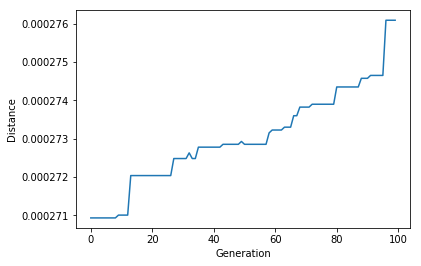

100


[[0, 1, 36, 46, 67],
 [83, 212, 220, 221],
 [16],
 [10, 35, 51, 72, 84, 95, 89, 115, 117, 136],
 [12, 15, 44, 149, 169],
 [31, 52, 68, 75, 121],
 [58, 49, 93, 103],
 [203],
 [11, 25, 37],
 [13, 30, 48, 63, 81, 91, 113, 137],
 [139, 96, 120, 14, 148],
 [87, 20, 33, 17, 106, 126],
 [142, 159, 168],
 [18, 26, 69, 65, 34, 79, 99, 102, 144],
 [131, 156],
 [21, 55, 105, 160],
 [22, 71, 73, 109, 199],
 [104, 57, 23, 177, 200, 206],
 [3, 70, 82, 118, 161, 189, 201],
 [210],
 [88, 129, 202, 213],
 [119, 122, 143, 145, 162, 176, 188, 209, 222],
 [19, 32, 50, 110, 152, 175, 194, 214],
 [170, 182, 140, 185],
 [61, 97, 141],
 [38, 77, 147, 173, 195, 197],
 [66, 40, 2, 90, 135],
 [207, 217, 218, 219],
 [54, 62, 78, 92, 100, 114, 124, 128, 191],
 [64, 80, 101, 112],
 [134, 150, 181],
 [7, 27, 98, 163, 111, 171],
 [190, 208],
 [193, 157, 86, 211],
 [133, 178, 179, 205],
 [28, 53, 85],
 [39, 59, 76, 167, 196, 216],
 [24, 45, 60, 94, 130, 165, 166],
 [138, 127, 56, 29, 6, 164, 183],
 [4, 158, 184],
 [5,

time: 139 ms


In [32]:
plt.plot(progress)
plt.ylabel('Distance')
plt.xlabel('Generation')
plt.show()
print(len(progress))
r

In [ ]:
# continue optimizing
for i in range(len(allSolutions)-1,len(allSolutions)+1000):
    t=geneticAlgorithm(population=copy.deepcopy(allSolutions[i]), popSize=100, eliteSize=10, generations=500)
    allSolutions.append( copy.deepcopy(t) )
    print(allSolutions[-1])